In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

<h2 align="center" style="color:blue">Data Loading</h2>

In [2]:
df = pd.read_excel("premiums.xlsx")

In [3]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [4]:
print("No. of Rows and Columns are : ",df.shape)

No. of Rows and Columns are :  (50000, 13)


In [5]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


<h2 align="center" style="color:blue">Exploratory Data Analysis</h2>

In [6]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [7]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates().sum()
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


## Data Cleaning

In [11]:
df[df["number_of_dependants"]<0]["number_of_dependants"].unique()

array([-3, -1])

There are some negative values in number_of_dependants columns. We can replace them with positive numbers

In [12]:
df['number_of_dependants'] = df['number_of_dependants'].abs()
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.717284,23.021150,15766.810189
std,15.000378,1.491953,24.221794,8419.995271
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


## Univariate Analysis : Numeric Columns

In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns  

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

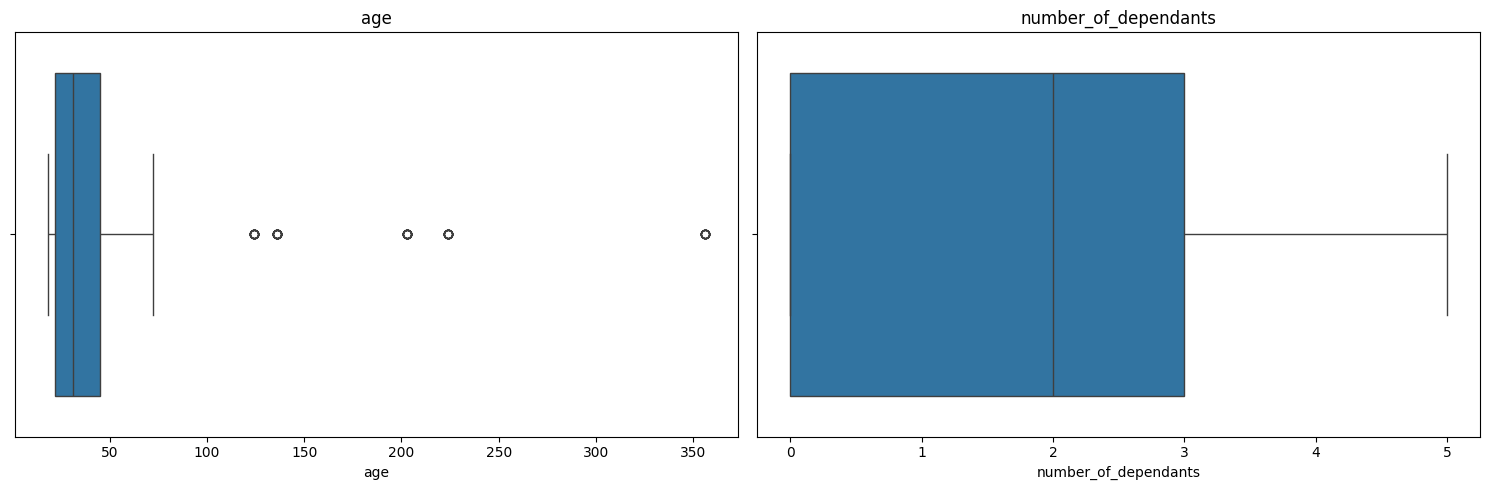

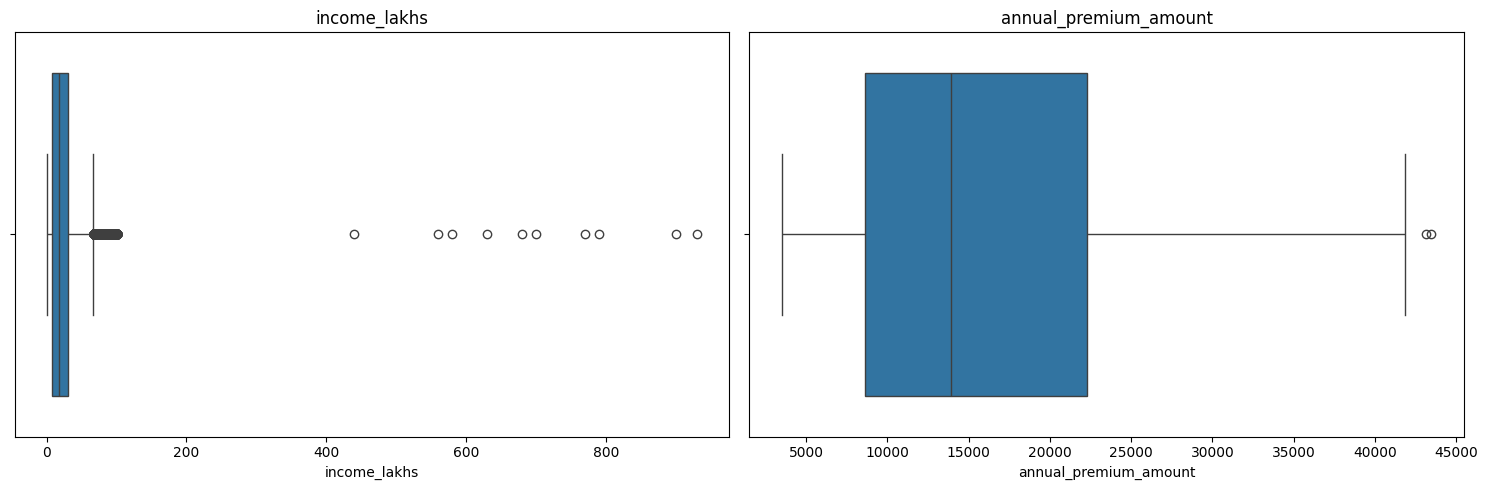

In [14]:
for i in range(0, len(numeric_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    if i < len(numeric_columns):
        sns.boxplot(ax=axes[0], x=df[numeric_columns[i]])
        axes[0].set_title(numeric_columns[i])
    
    if i + 1 < len(numeric_columns):
        sns.boxplot(ax=axes[1], x=df[numeric_columns[i + 1]])
        axes[1].set_title(numeric_columns[i + 1])
    
    plt.tight_layout()
    plt.show()

## Outlier Treatment : Age column

In [15]:
df[df["age"]>100]["age"].unique()

array([224, 124, 136, 203, 356])

In [16]:
df1 = df[df["age"]<=100]

In [17]:
df1.age.describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

## Outlier Treatment : Income_lakhs column

In [18]:
quantile_thresold = df1['income_lakhs'].quantile(0.999)
quantile_thresold

np.float64(100.0)

In [19]:
df1[df1.income_lakhs>quantile_thresold].shape

(10, 13)

In [20]:
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.income_lakhs.describe()

count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

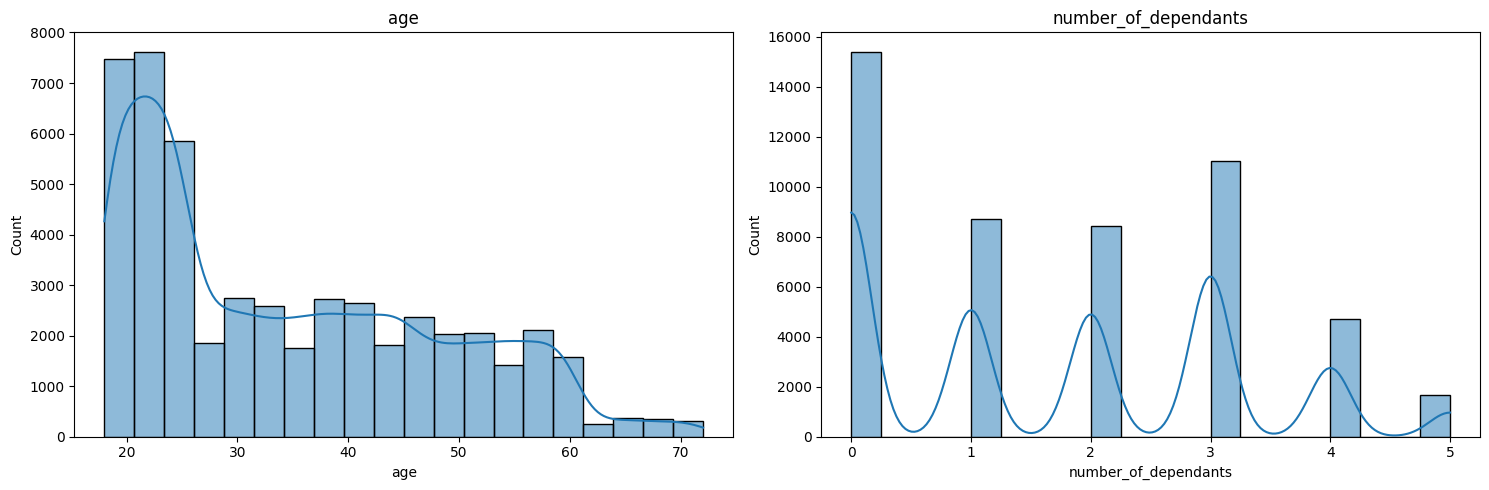

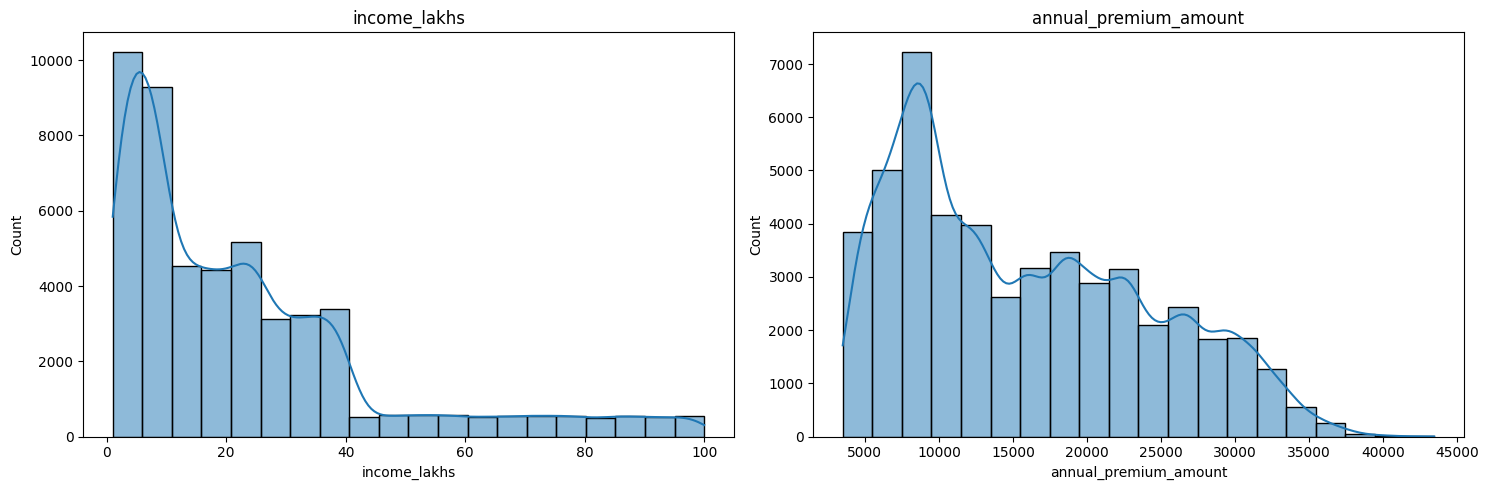

In [21]:
for i in range(0, len(numeric_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    if i < len(numeric_columns):
        sns.histplot(df2[numeric_columns[i]], bins=20, kde=True, ax=axes[0], edgecolor='black')
        axes[0].set_title(numeric_columns[i])
    
    if i + 1 < len(numeric_columns):
        sns.histplot(df2[numeric_columns[i + 1]], bins=20, kde=True, ax=axes[1], edgecolor='black')
        axes[1].set_title(numeric_columns[i + 1])
    
    plt.tight_layout()
    plt.show()

## Bivariate Analysis : Numeric colunms

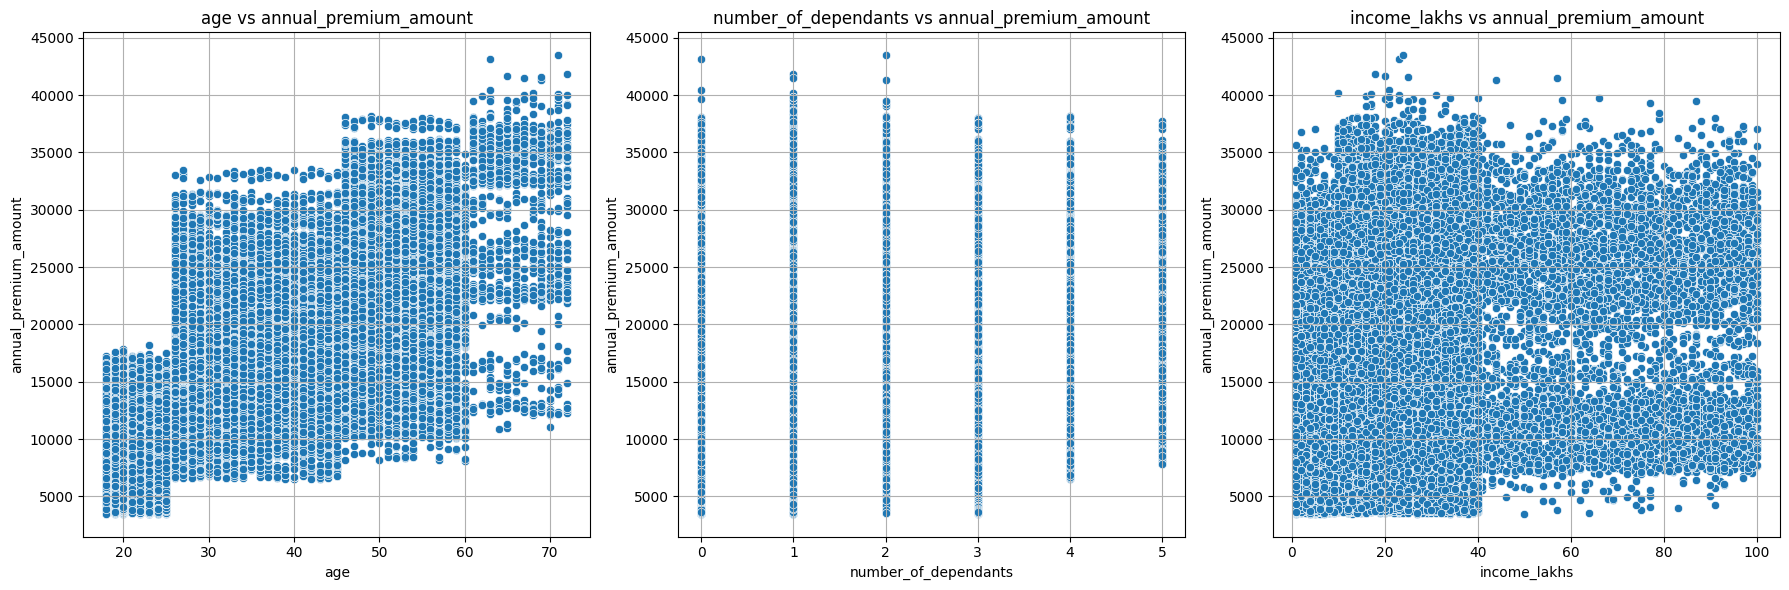

In [22]:
# Columns to plot
columns_to_plot = ['age', 'number_of_dependants', 'income_lakhs']
target_column = 'annual_premium_amount'

# Create subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 6))

# Loop through the columns and create scatter plots
for ax, col in zip(axes, columns_to_plot):
    sns.scatterplot(data=df2, x=col, y=target_column, ax=ax)
    ax.set_title(f'{col} vs {target_column}')
    ax.set_xlabel(col)
    ax.set_ylabel(target_column)
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## Categorical Columns

In [23]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [24]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional', 'Smoking=0',
       'Does Not Smoke', 'Not Smoking'], dtype=object)

In [25]:
df2['smoking_status'] = df2['smoking_status'].replace({
            'Smoking=0' : 'No Smoking',
            'Does Not Smoke' : 'No Smoking',
            'Not Smoking' : 'No Smoking'
})
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

## Univariate Analysis

In [26]:
pct_count = df2['gender'].value_counts(normalize = True)
pct_count

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

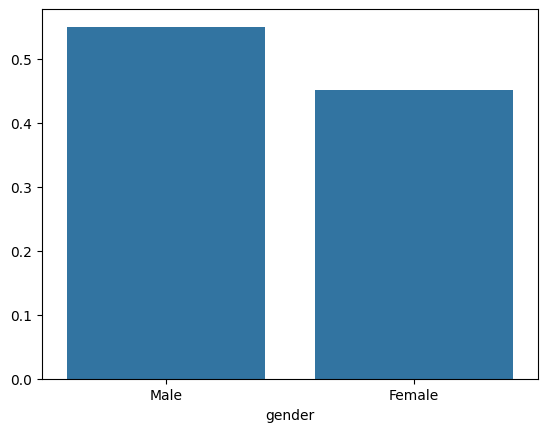

In [27]:
sns.barplot(x = pct_count.index, y = pct_count.values)
plt.show()

C:\Users\zahee\AppData\Local\Temp\ipykernel_22680\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_22680\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_22680\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\zahee\AppData\Local\Temp\ipykernel_22680\189506655.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

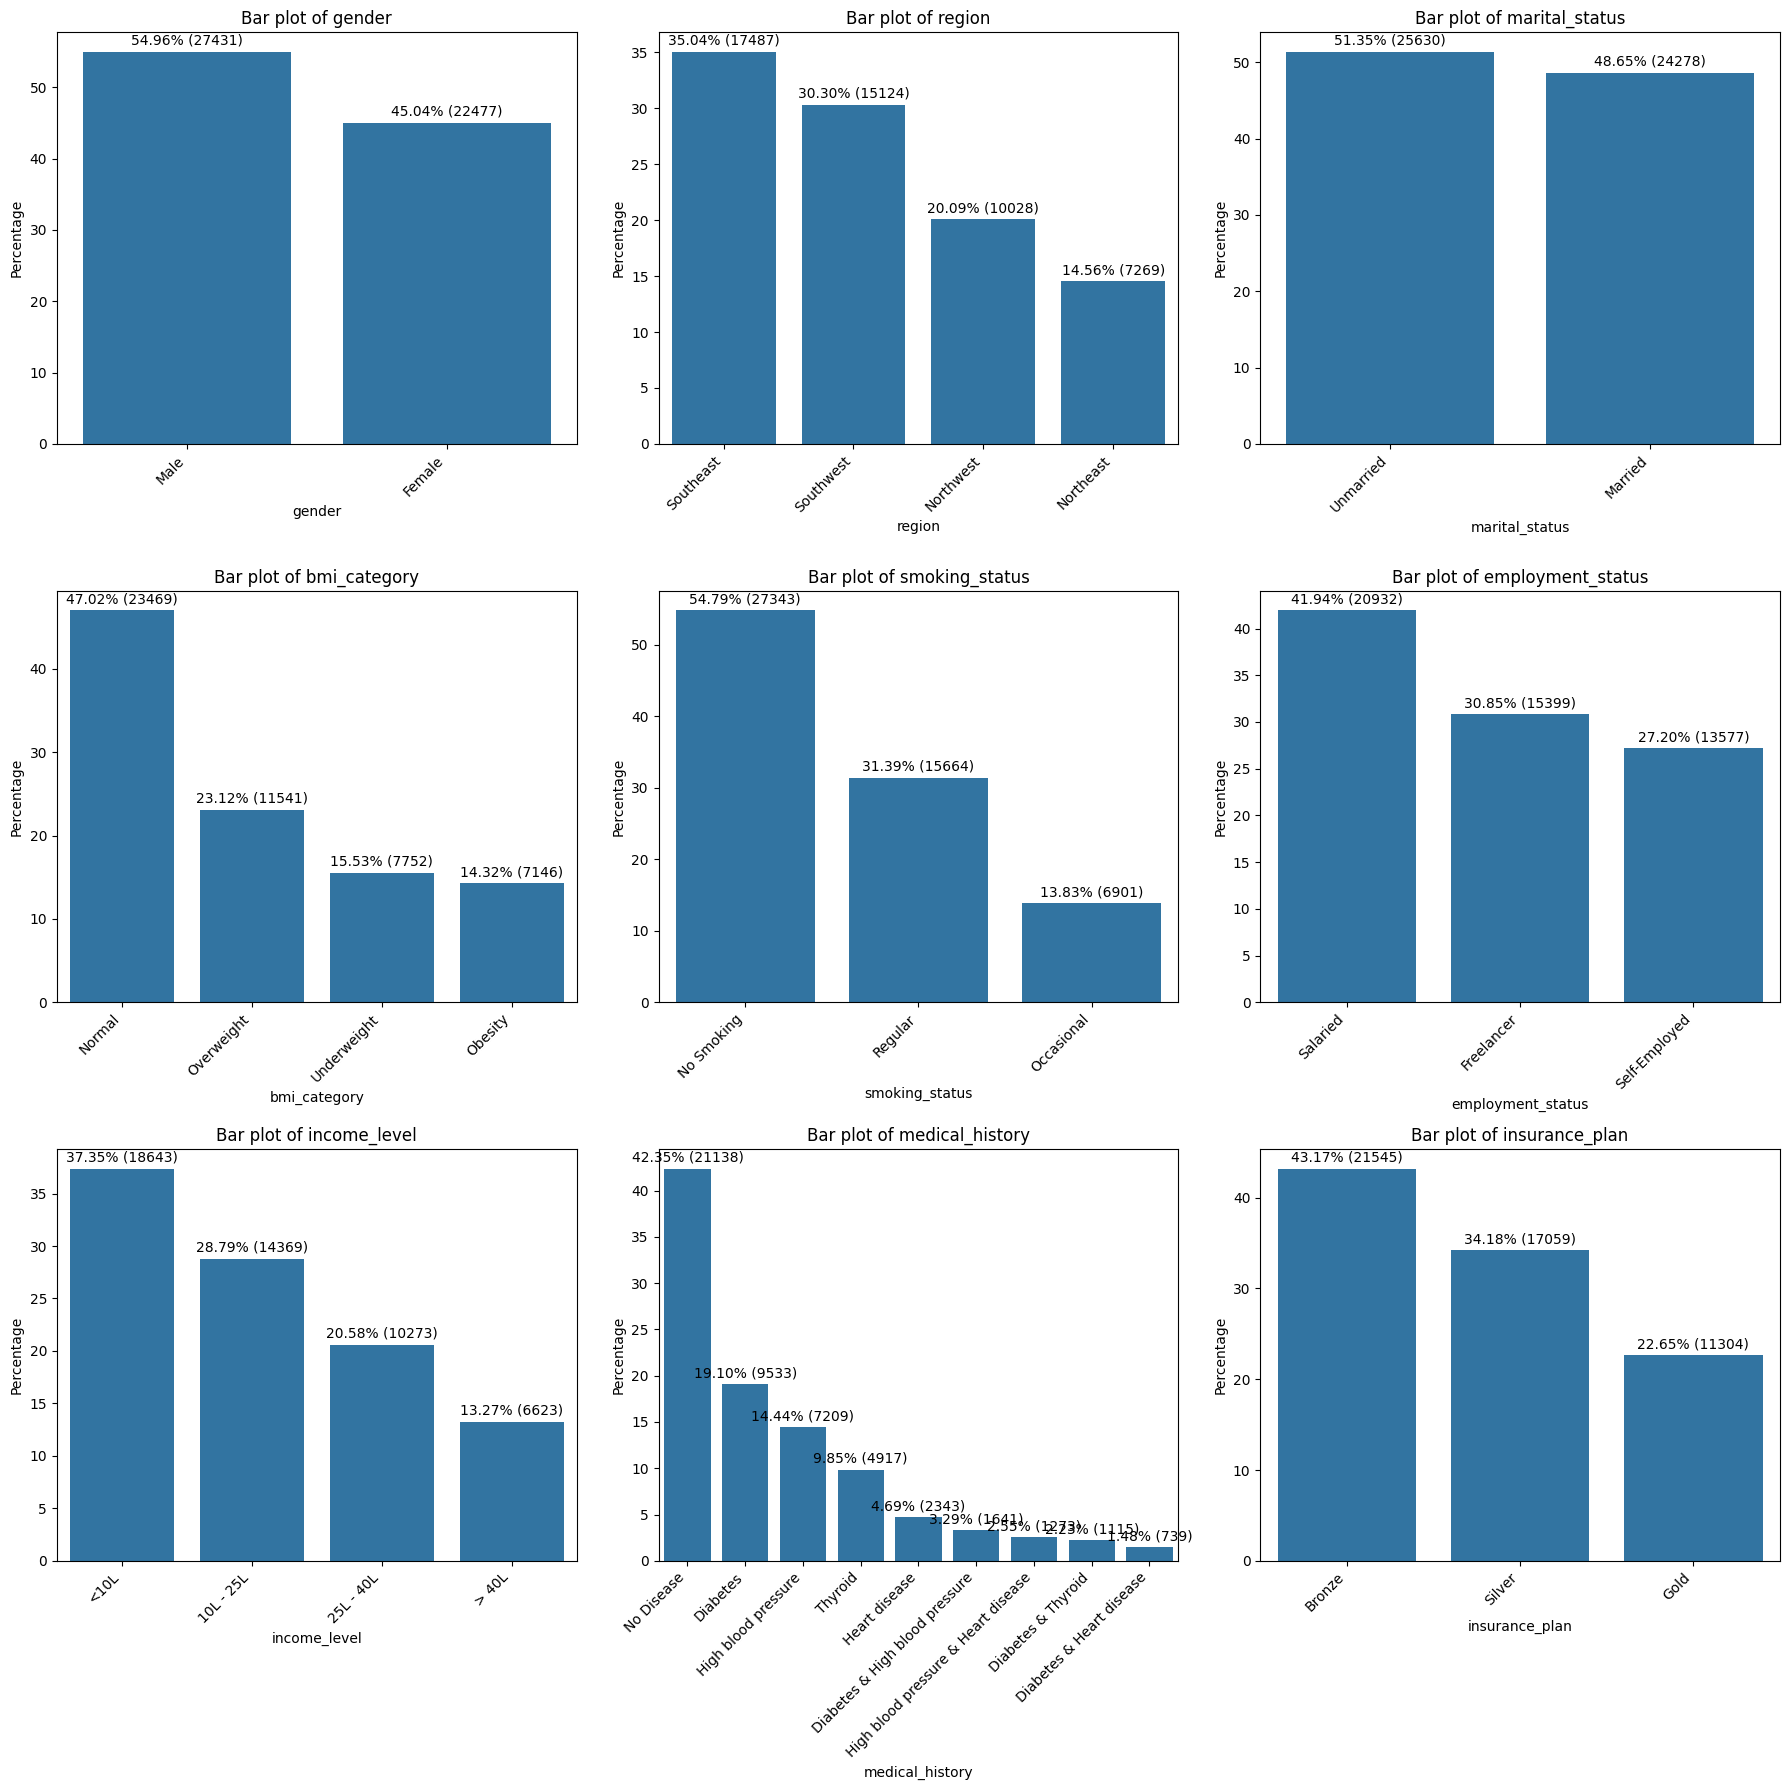

In [28]:

# Determine number of rows and columns for subplots
num_plots = len(categorical_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Ceiling division

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axs = axs.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_cols):
    ax = axs[i]
    plot_data = df2[col].value_counts(normalize=True) * 100
    sns.barplot(x=plot_data.index, y=plot_data.values, ax=ax)
    ax.set_title(f'Bar plot of {col}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)

    # Add text annotations for percentage and value
    for p, val in zip(ax.patches, df2[col].value_counts()):
        percentage = f'{p.get_height():.2f}%'
        value = f' ({val})'
        ax.annotate(percentage + value, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [29]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


<Axes: xlabel='income_level'>

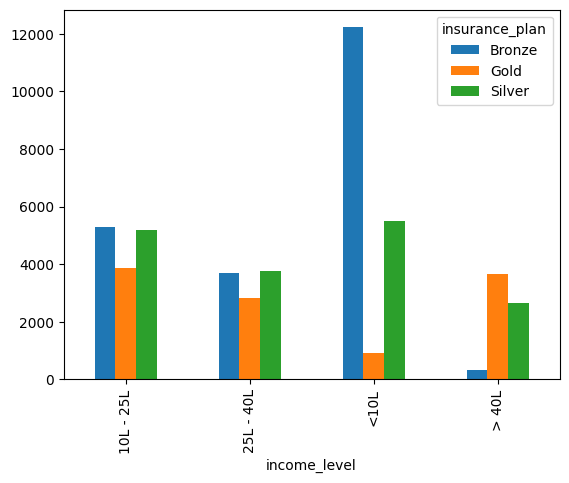

In [30]:
crosstab.plot(kind = 'bar')

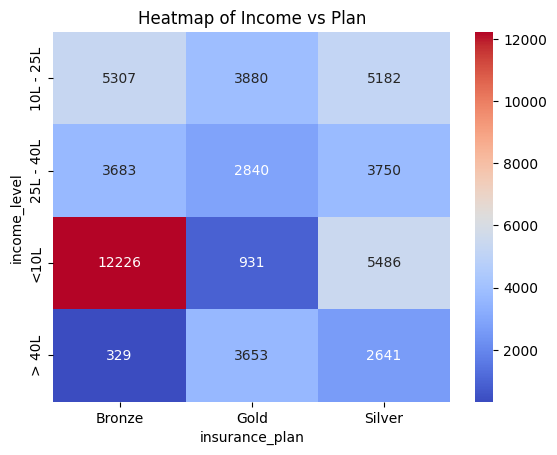

In [31]:
sns.heatmap(crosstab, annot=True, cmap='coolwarm',fmt="d")
plt.title('Heatmap of Income vs Plan')
plt.show()

<h2 align="center" style="color:blue">Feature Engineering</h2>

In [32]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [33]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

## Risk score calculation

In [34]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

C:\Users\zahee\AppData\Local\Temp\ipykernel_22680\59644619.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\zahee\AppData\Local\Temp\ipykernel_22680\59644619.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


In [35]:
df3 = df2.drop(["disease1","disease2","total_risk_score","medical_history"], axis = "columns")
df3.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Bronze,9053,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Bronze,16339,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,Silver,18164,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,Gold,20303,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,Silver,13365,0.428571


In [36]:
df3["income_level"] = df3["income_level"].map({'<10L' : 1, '10L - 25L' : 2, '> 40L' : 3, '25L - 40L' : 4 })
df3["income_level"].unique()

array([1, 2, 3, 4])

In [37]:
df3['insurance_plan'] = df3['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})
df3["insurance_plan"].unique()

array([1, 2, 3])

In [38]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df3, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49908 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              49908 non-null  int64  
 1   number_of_dependants             49908 non-null  int64  
 2   income_level                     49908 non-null  int64  
 3   income_lakhs                     49908 non-null  int64  
 4   insurance_plan                   49908 non-null  int64  
 5   annual_premium_amount            49908 non-null  int64  
 6   normalized_risk_score            49908 non-null  float64
 7   gender_Male                      49908 non-null  int64  
 8   region_Northwest                 49908 non-null  int64  
 9   region_Southeast                 49908 non-null  int64  
 10  region_Southwest                 49908 non-null  int64  
 11  marital_status_Unmarried         49908 non-null  int64  
 12  bmi_category_Obesity   

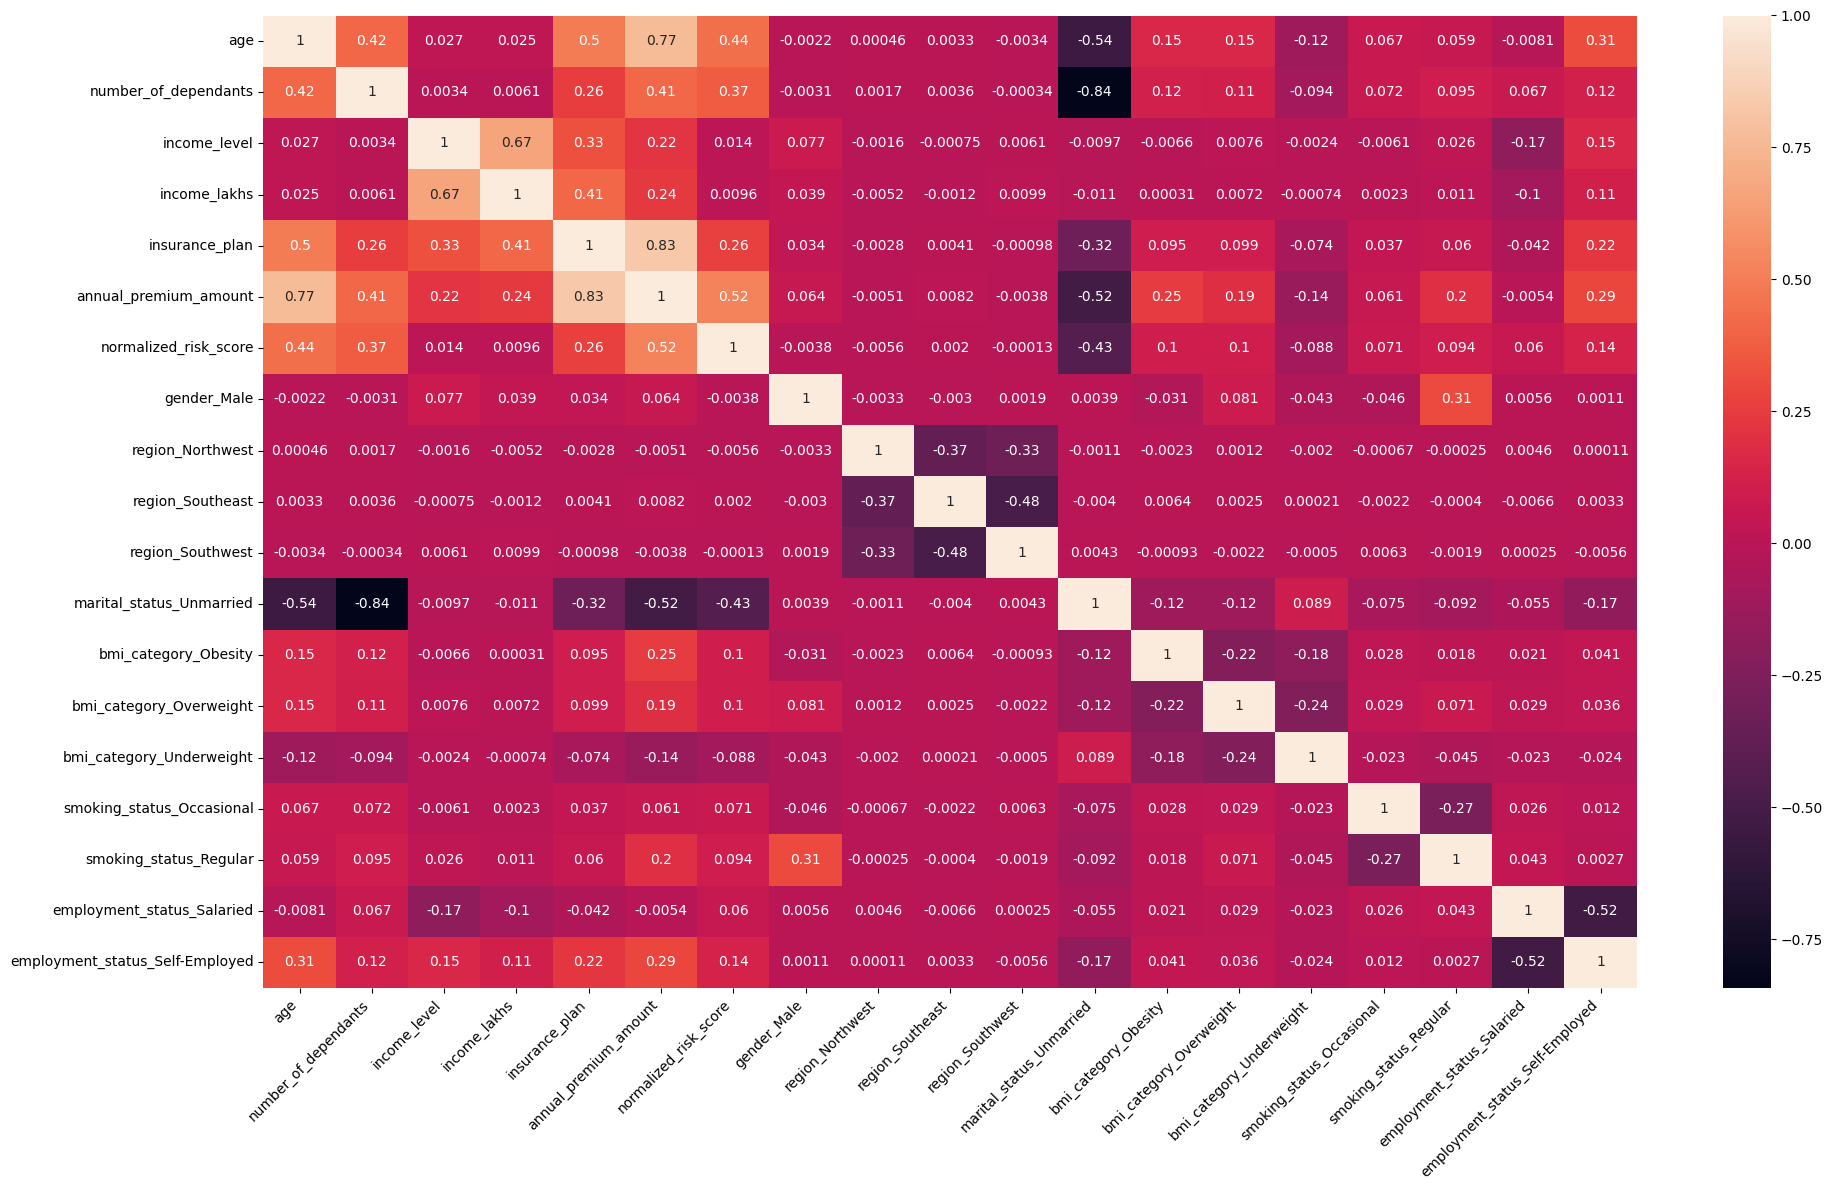

In [42]:
cm = df3.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
X = df3.drop("annual_premium_amount", axis = 1)
y = df3["annual_premium_amount"]
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.390278,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.380124,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [47]:
calculate_vif(X)

,Feature,VIF
0,age,4.546828
1,number_of_dependants,4.552788
2,income_level,3.809392
3,income_lakhs,3.940341
4,insurance_plan,3.470028
5,normalized_risk_score,2.688740
6,gender_Male,2.424683
7,region_Northwest,2.103537
8,region_Southeast,2.923930
9,region_Southwest,2.671921


<h2 align="center" style="color:blue">Model Traning</h2>

In [51]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr_train_score = model_lr.score(X_train, y_train)
model_lr_test_score = model_lr.score(X_test, y_test)
print(f'Linear Regression Train Score: {model_lr_train_score}')
print(f'Linear Regression Test Score: {model_lr_test_score}')

Linear Regression Train Score: 0.9289394621235575
Linear Regression Test Score: 0.9281909540457857


In [57]:
model_lr.intercept_

np.float64(4605.587433952334)

In [58]:
model_lr.coef_

array([11272.96743409,  -530.11934107,   745.83661193, -1167.35578718,
       12463.34138389,  4832.98961352,    98.33093112,   -42.6740089 ,
          29.99712027,   -13.04823617,  -827.91246872,  3369.86110475,
        1613.3572814 ,   355.04390146,   718.92854007,  2254.87326571,
         195.42002124,   361.66872252])

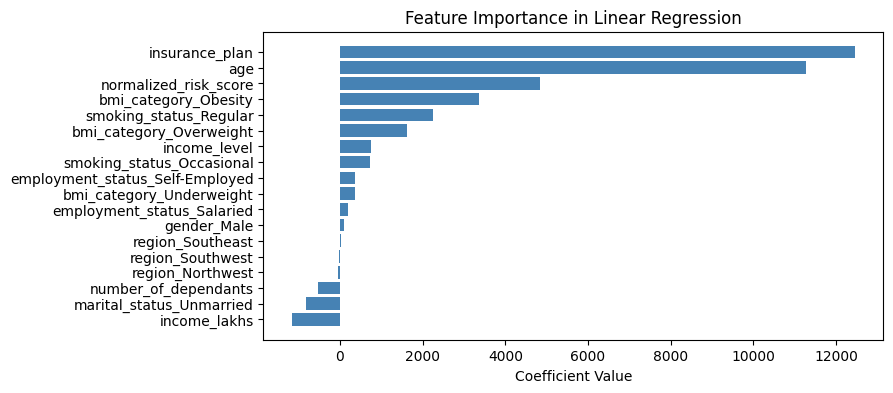

In [59]:
feature_importance = model_lr.coef_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [55]:
# Lasso Regression
model_la = Lasso(alpha = 0.1)
model_la.fit(X_train, y_train)
model_la_train_score = model_la.score(X_train, y_train)
model_la_test_score = model_la.score(X_test, y_test)
print(f'Lasso Regression Train Score: {model_la_train_score}')
print(f'Lasso Regression Test Score: {model_la_test_score}')

Lasso Regression Train Score: 0.9289394243330957
Lasso Regression Test Score: 0.9281902963167713


In [56]:
# Ridge Regression
model_rg = Ridge(alpha = 0.1)
model_rg.fit(X_train, y_train)
model_rg_train_score = model_rg.score(X_train, y_train)
model_rg_test_score = model_rg.score(X_test, y_test)
print(f'Ridge Regression Train Score: {model_rg_train_score}')
print(f'Ridge Regression Test Score: {model_rg_test_score}')

Ridge Regression Train Score: 0.9289394617807226
Ridge Regression Test Score: 0.9281909410663078


## Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for Random Forest
rf_param_distributions = {
    'n_estimators': randint(50, 200),  # Reduce the range of n_estimators
    'max_features': ['sqrt'],           # Keep only 'sqrt' for simplicity
    'max_depth': randint(5, 15),        # Limit max_depth
}

# Set up RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit Random Forest
rf_random_search.fit(X_train, y_train)

# Print best parameters for Random Forest
print("Best parameters for Random Forest:")
print(rf_random_search.best_params_)
print("Best Score for Random Forest:")
print(rf_random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for Random Forest:
{'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 173}
Best Score for Random Forest:
0.9757746441674676


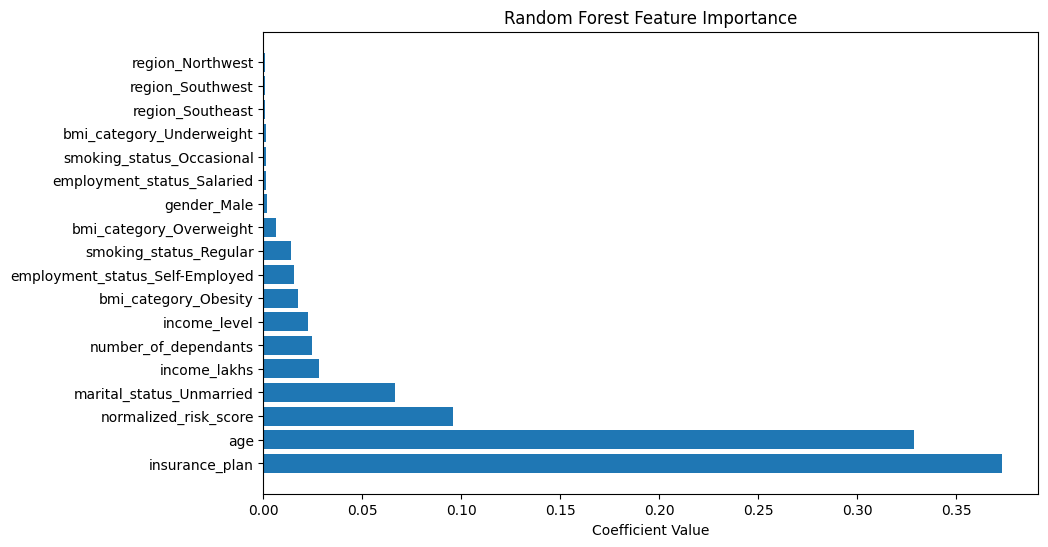

In [77]:
best_rf = rf_random_search.best_estimator_
rf_importances = best_rf.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.barh(range(X.shape[1]), rf_importances[rf_indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[rf_indices])
plt.xlabel('Coefficient Value')
plt.show()


## XGBoost

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the simplified hyperparameter grid for XGBoost
xgb_param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500, 1000],         # Reduced range for n_estimators
    'max_depth': randint(3, 10),              # Limit max_depth
    'learning_rate': uniform(0.01, 0.2),      # Learning rate between 0.01 and 0.2
    'subsample': uniform(0.5, 0.5),           # Subsample between 0.5 and 1
}

# Set up RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_distributions, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit XGBoost
xgb_random_search.fit(X_train, y_train)

# Print best parameters for XGBoost
print("Best parameters for XGBoost:")
print(xgb_random_search.best_params_)
print("Best Score for XGBoost:")
print(xgb_random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for XGBoost:
{'learning_rate': np.float64(0.019290082543999547), 'max_depth': 5, 'n_estimators': 500, 'subsample': np.float64(0.7252496259847715)}
Best Score for XGBoost:
0.9819530248641968


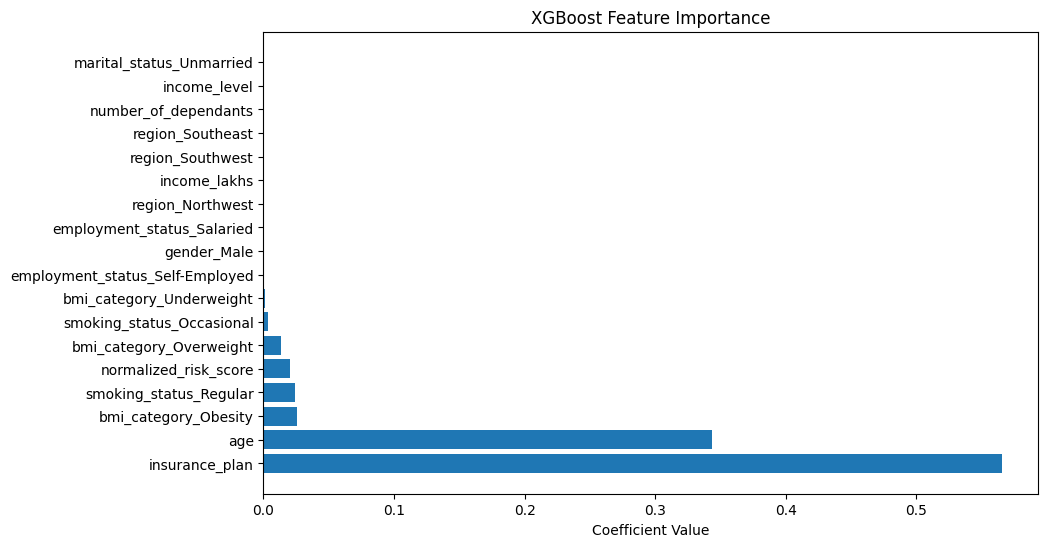

In [76]:
best_xgb = xgb_random_search.best_estimator_

# Get feature importances
importances = best_xgb.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

best_xgb = xgb_random_search.best_estimator_

xgb_importances = best_xgb.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

# Feature Importance Plot for XGBoost
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.barh(range(X.shape[1]), xgb_importances[xgb_indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[xgb_indices])
plt.xlabel('Coefficient Value')
plt.show()

<h2 align = "center" style = "color : blue">Error Analysis</h2>

In [87]:
y_pred = best_xgb.predict(X_test)
residuals = y_pred-y_test
residuals_pct = (residuals/y_test)*100
results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.sample(5)

,actual,predicted,diff,diff_pct
45929,10214,10871.557617,657.557617,6.437807
45984,16581,16674.083984,93.083984,0.561389
4621,23607,23367.501953,-239.498047,-1.014521
16068,4728,7320.745605,2592.745605,54.838105
25789,8443,6444.837402,-1998.162598,-23.666500


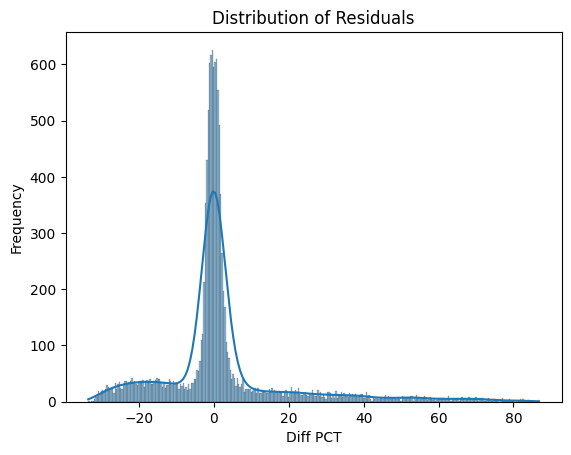

In [83]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [97]:
extreme_error_threshold = 10
extreme_result_df= results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_result_df.shape

(3629, 4)

In [98]:
extreme_error_pct = extreme_result_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

29.085517351927546

In [99]:
extreme_result_df[abs(extreme_result_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct
23975,3520,6577.190918,3057.190918,86.852015
10288,3517,6570.538086,3053.538086,86.822237
29904,3503,6533.335938,3030.335938,86.506878
42342,3521,6523.617188,3002.617188,85.277398
37192,3541,6558.770508,3017.770508,85.223680
...,...,...,...,...
1397,5219,7846.223145,2627.223145,50.339589
5948,4322,6496.691895,2174.691895,50.316795
43357,4439,6671.117188,2232.117188,50.284235
24725,5072,7617.822754,2545.822754,50.193666


In [102]:
extreme_errors_df = X_test.loc[extreme_result_df.index]
extreme_errors_df.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
201,0.129630,0.2,0.666667,0.636364,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
25471,0.074074,0.0,0.000000,0.010101,0.0,0.0,1,1,0,0,1,0,1,0,0,1,1,0


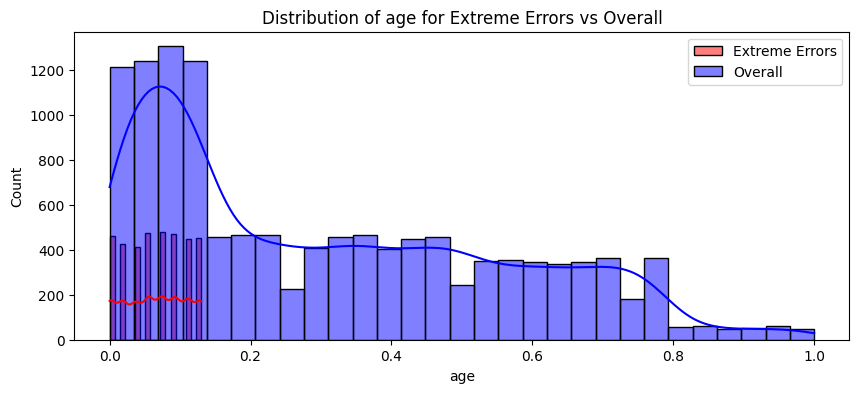

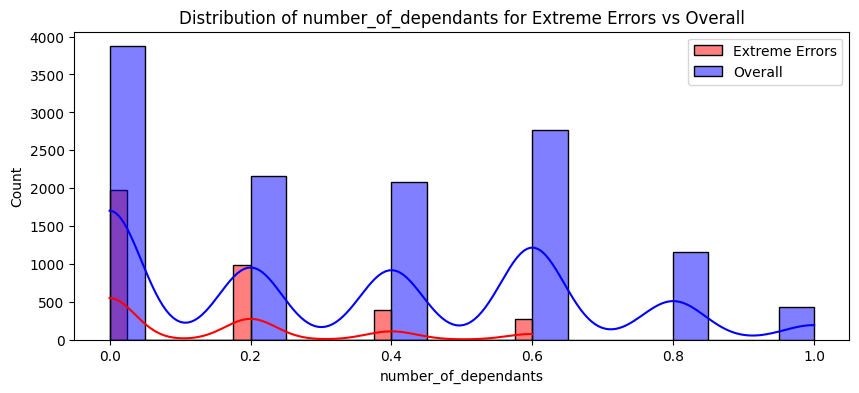

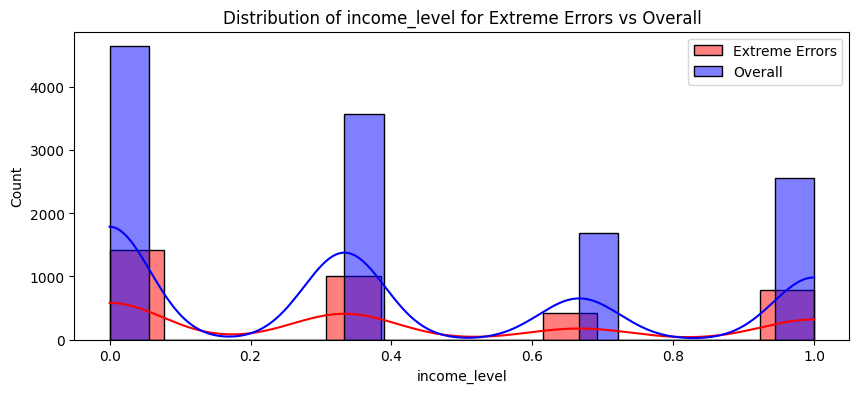

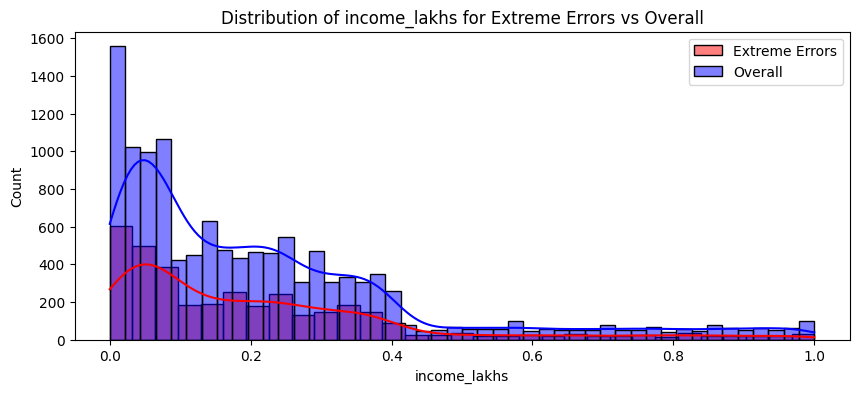

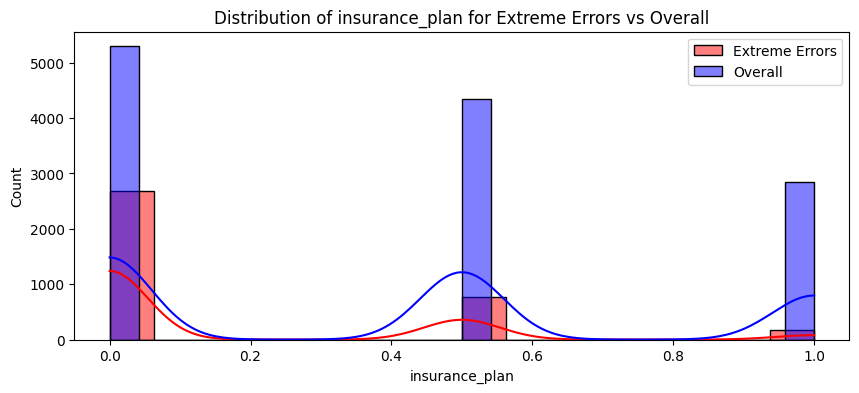

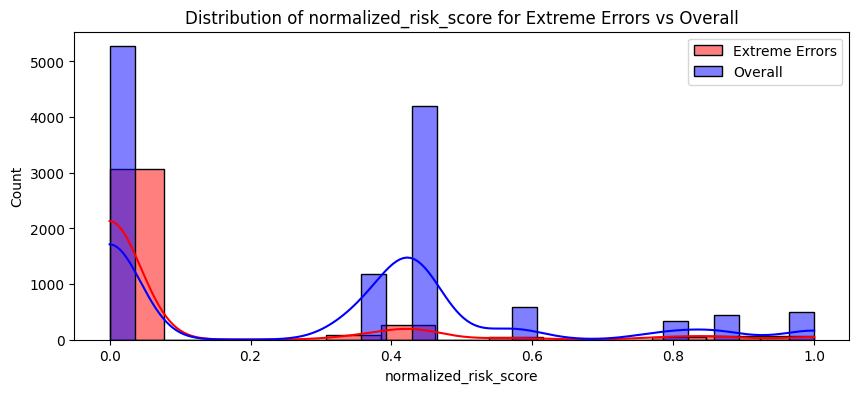

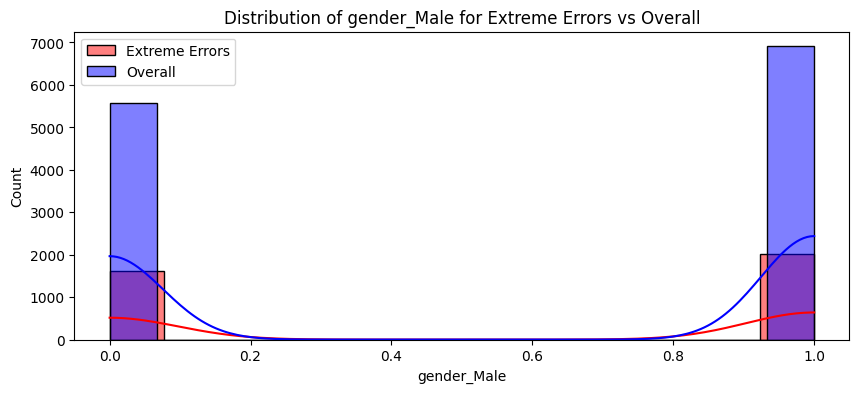

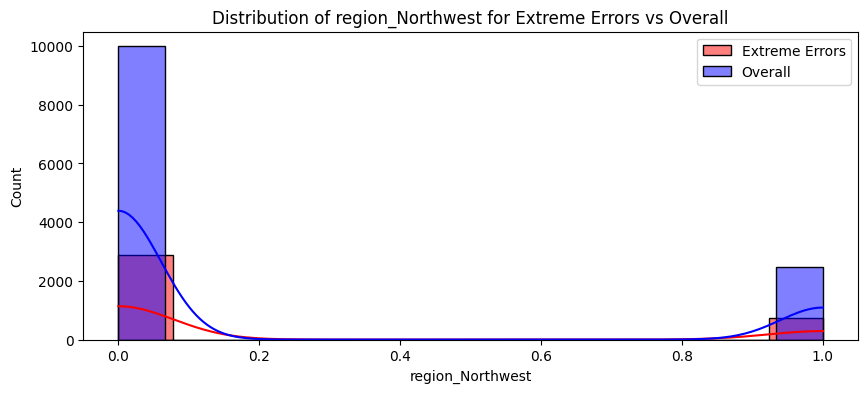

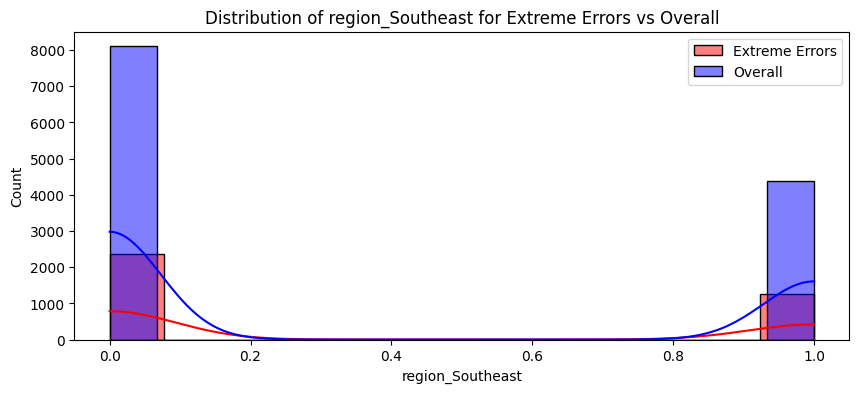

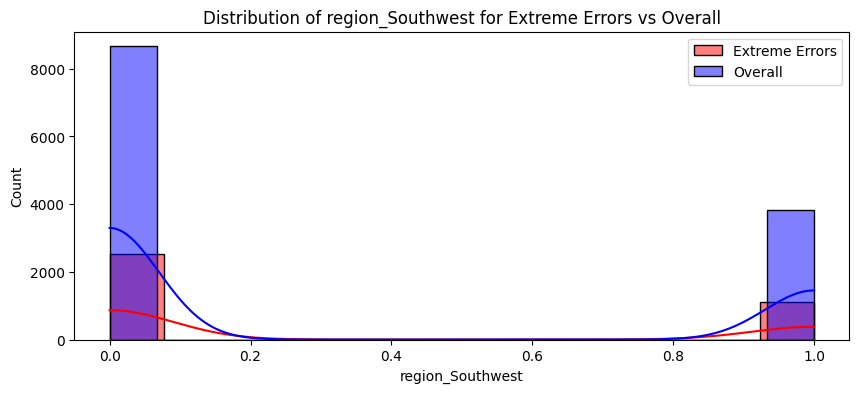

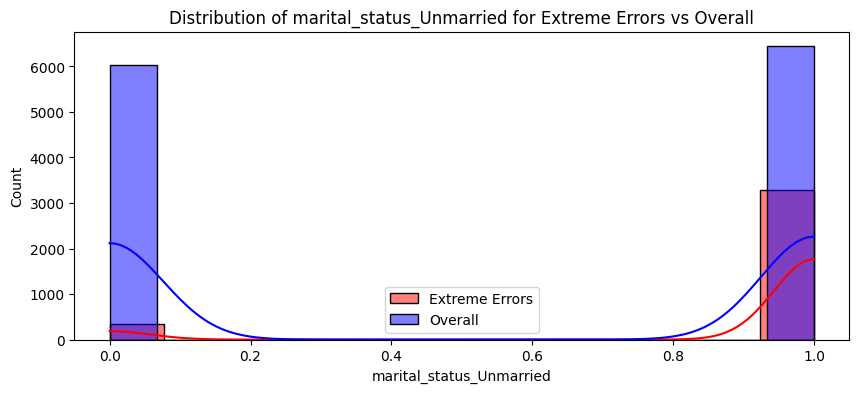

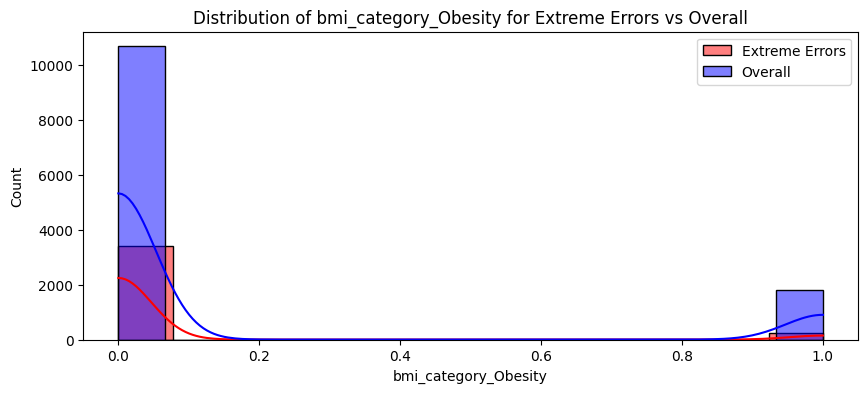

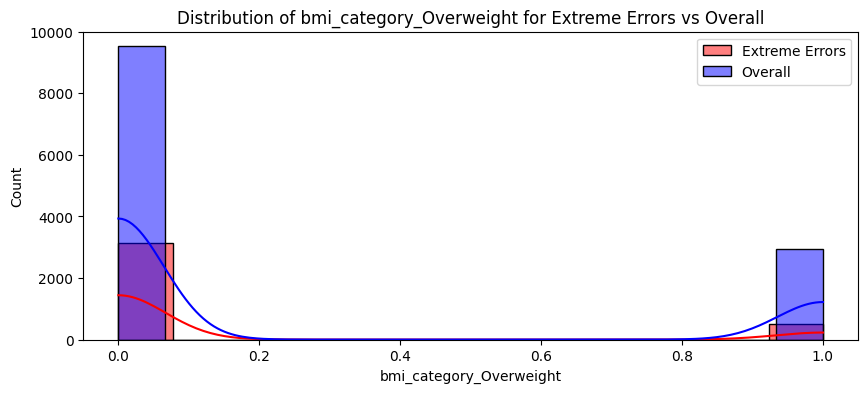

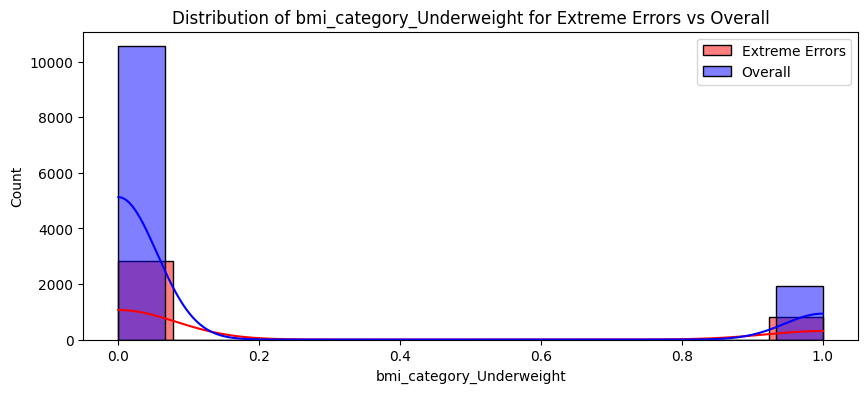

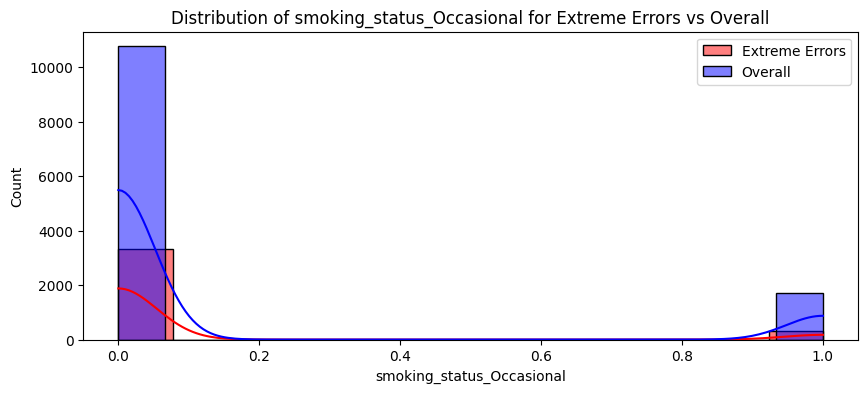

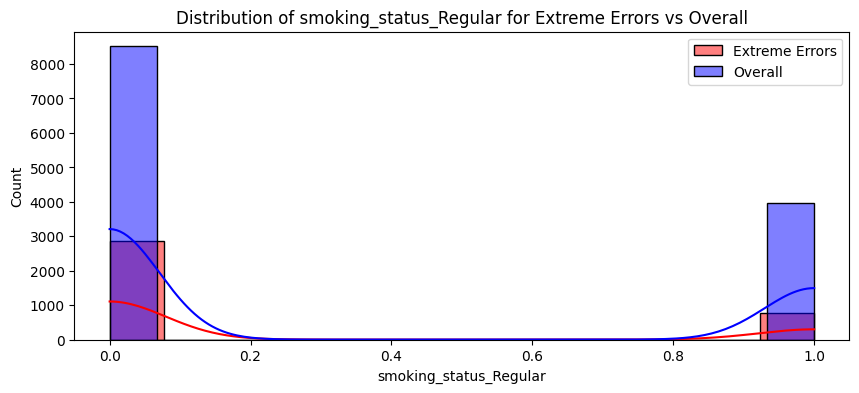

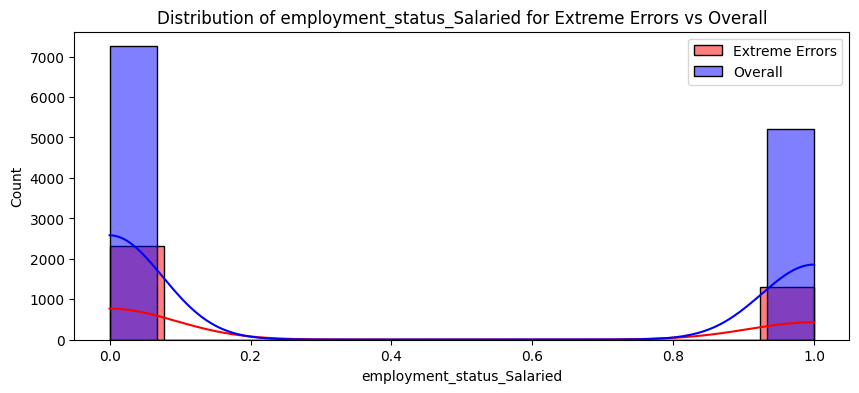

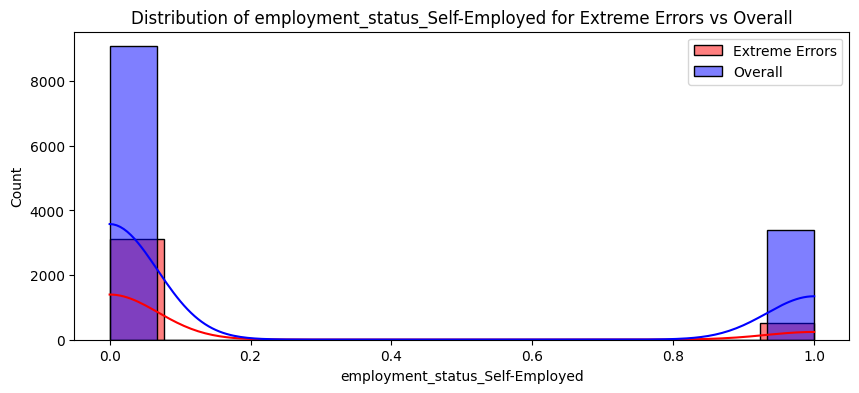

In [103]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_errors_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [104]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,25.0,1.0,3.0,64.0,3.0
1,22.0,0.0,1.0,2.0,1.0
2,24.0,0.0,3.0,43.0,3.0
3,20.0,0.0,4.0,30.0,1.0
4,24.0,0.0,3.0,61.0,2.0


In [105]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000
mean,21.531827,0.710940,2.156241,21.955911,1.308901
std,2.281920,0.930284,1.159831,21.291196,0.556292
min,18.000000,0.000000,1.000000,1.000000,1.000000
25%,20.000000,0.000000,1.000000,6.000000,1.000000
50%,22.000000,0.000000,2.000000,16.000000,1.000000
75%,23.000000,1.000000,3.000000,31.000000,2.000000
max,25.000000,3.000000,4.000000,100.000000,3.000000


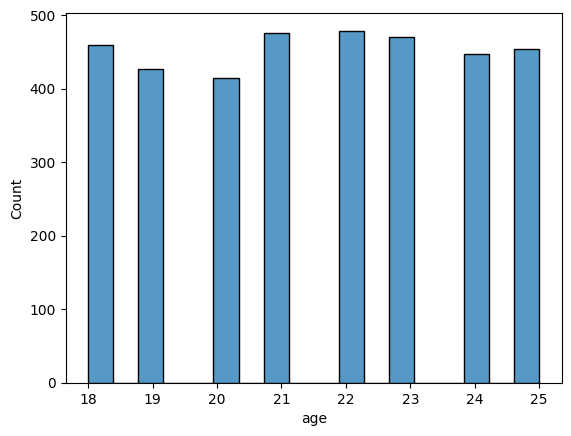

In [112]:
sns.histplot(df_reversed.age)
plt.show()